### SMAGL Night Monkey CNN Testing Code ###

__Created on Sunday Feb 9 19:00:10 2025__

__Shaotai Hu (Primary Developer)__


__Noam Aviv (Secondary Developer)__


__References:__


Renotte, Nicholas. "Build a Deep CNN Image Classifier with ANY Images." _Youtube_, 25 Apr. 2022, https://www.youtube.com/watch?v=jztwpsIzEGc.


In [1]:
# packages
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import seaborn as se
import numpy as np
import warnings
import random
import pandas as pd

In [2]:
"""
random selection Noam's idea, re-implemented by Shaotai

!!!
Note: need to replace the yes and no folders in temp_pics with
the yes and no folders in OG_pics everytime manually and delete
yes and no folder in train_pics before you RUN this CELL!!
!!!
"""
folder1 = "temp_pics/yes"
folder2 = "temp_pics/no"

images_folder1 = [f for f in os.listdir(folder1) if os.path.isfile(os.path.join(folder1, f))]
images_folder2 = [f for f in os.listdir(folder2) if os.path.isfile(os.path.join(folder2, f))]

num_samples = 2500

sampled_images_folder1 = random.sample(images_folder1, num_samples)
sampled_images_folder2 = random.sample(images_folder2, num_samples)

output_dir = "train_pics"
new_folder1 = os.path.join(output_dir, 'yes')
new_folder2 = os.path.join(output_dir, 'no')

os.makedirs(new_folder1, exist_ok=True)
os.makedirs(new_folder2, exist_ok=True)

for image in sampled_images_folder1:
    src = os.path.join(folder1, image)
    dst = os.path.join(new_folder1, image)
    os.rename(src, dst)  

for image in sampled_images_folder2:
    src = os.path.join(folder2, image)
    dst = os.path.join(new_folder2, image)
    os.rename(src, dst)  

In [3]:
"""
add the interation to skip every 3 images to see if accuracy, loss, and etc is improved
- make a function that takes every 4 fourth image in the folders, and puts it into a new yes or no folder
- use this new yes or no folder to train the model
""";

In [4]:
# preprocessing 1
data = tf.keras.utils.image_dataset_from_directory("train_pics", batch_size = 10)
data_list = data.as_numpy_iterator()
images_array = data_list.next()

Found 1333 files belonging to 2 classes.


In [5]:
# preprocessing 2
scl = images_array[0]
factor = scl.max()
data = data.map(lambda x, y: (x/factor, y))
# To decide split train and test
len(data)

134

In [6]:
# train, val, test split
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.1)
test_size = int(len(data)*0.3)
tts = f"Model # : training size = {train_size}, validation size = {val_size}, test size = {test_size} (per randomly selected batch)"
tts

'Model # : training size = 80, validation size = 13, test size = 40 (per randomly selected batch)'

In [7]:
training = data.take(train_size)
valing = data.skip(train_size).take(val_size)
testing = data.skip(train_size+val_size).take(test_size)

In [8]:
# CNN 
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(keras.Input(shape = (256, 256, 3)))

model.add(Conv2D(32, (3, 3), 1, activation='relu', padding = 'same'))
model.add(Conv2D(32, (3, 3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

# To prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))

# since our question is yes or no, we use sigmoid 1 or 0
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
# compiling the model with optimizers, loss functions and metric for evaluation
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,334,209 (256.86 MB)

 Trainable params: 67,334,209 (256.86 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Training
logdir = "logs"
save_log =  tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [14]:
fitted_log = model.fit(training, epochs = 50, validation_data = valing, callbacks = [save_log])

Epoch 1/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 442ms/step - accuracy: 0.5902 - loss: 0.8438 - val_accuracy: 0.8000 - val_loss: 0.4661
Epoch 2/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 432ms/step - accuracy: 0.7563 - loss: 0.4585 - val_accuracy: 0.9375 - val_loss: 0.2147
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 442ms/step - accuracy: 0.8707 - loss: 0.2917 - val_accuracy: 0.9250 - val_loss: 0.2146
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 442ms/step - accuracy: 0.8919 - loss: 0.2613 - val_accuracy: 0.8500 - val_loss: 0.3229
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 438ms/step - accuracy: 0.9014 - loss: 0.2182 - val_accuracy: 0.9375 - val_loss: 0.2878
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 441ms/step - accuracy: 0.9354 - loss: 0.1548 - val_accuracy: 0.9250 - val_loss: 0.4841
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 456ms/step - accuracy: 0.9372 - loss: 0.2002 - val_accuracy: 0.8750 - val_loss: 0.3033
Epoch 8/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 432ms/step - accuracy: 0.9429 - loss: 0.1804 - val_accu

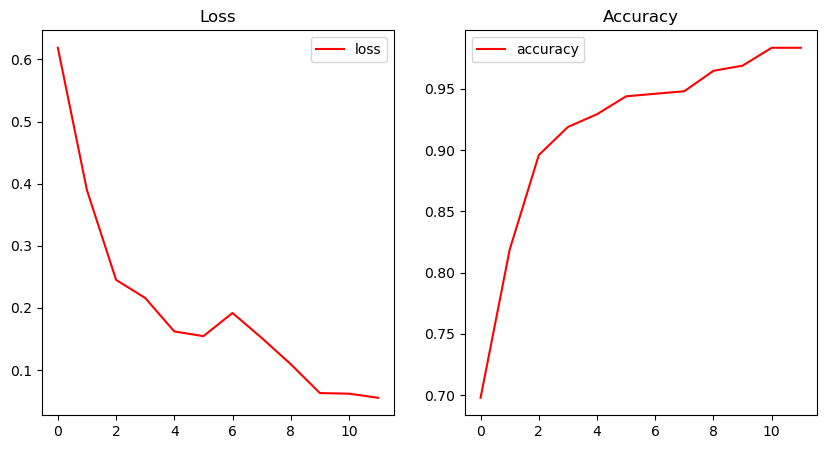

In [15]:
# plotting performance 
fig, axes = plt.subplots(1, 2, figsize =(10, 5))
axes[0].plot(fitted_log.history["loss"], color = "red", label = "loss")
axes[1].plot(fitted_log.history["accuracy"], color = "red", label = "accuracy")
axes[0].set_title("Loss")
axes[1].set_title("Accuracy");
axes[0].legend(loc= "upper right")
axes[1].legend(loc= "upper left")

In [ ]:
"""
### Testing:
not going to test model on test data for now, 
will just test the model on labeled data
and compare predictions to ground truth for accuracy
""";

In [17]:
model.save(os.path.join("models", "CNN_1.keras"))

In [19]:
from tensorflow.keras.models import load_model
loaded_model = load_model(os.path.join("models", "CNN_1.keras"))

In [20]:
# preprocessing 1
folder_path = 'OG_pics'

yes_folder = os.path.join(folder_path, 'yes')
no_folder = os.path.join(folder_path, 'no')

yes_images = [f for f in os.listdir(yes_folder) if f.lower().endswith(('.jpg'))]
no_images = [f for f in os.listdir(no_folder) if f.lower().endswith(('.jpg'))]

data = [(img, 'yes') for img in yes_images] + [(img, 'no') for img in no_images]

df = pd.DataFrame(data, columns=['Image Name', 'Label'])

In [ ]:
"""
text extraction
"""
from PIL import Image
import pytesseract

extracted_text = []
folder_path = "OG_pics/all"

for filename in df["Image Name"]:
    image_path = os.path.join(folder_path, filename)
    if os.path.exists(image_path):
        img = Image.open(image_path)
        width, height = img.size
        crop_area = (0, int(3 * height /4 ), width, height)
        cropped_img = img.crop(crop_area)
        text = pytesseract.image_to_string(cropped_img)
        extracted_text.append(text)
    else:
        extracted_text.append("")
df["Extracted Text"] = extracted_text

In [21]:
folder_path = 'OG_pics/all'
predictions = []
for filename in df['Image Name']:  
    image_path = os.path.join(folder_path, filename)
    if os.path.exists(image_path):  
        picture = cv2.imread(image_path)
        un_pic = tf.image.resize(picture, (256, 256))
        prediction = loaded_model.predict(np.expand_dims(un_pic / 255, 0))
        if prediction < 0.5:
            predictions.append("no")
        else:
            predictions.append("yes")
    else:
        predictions.append("")  
df['Predictions'] = predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [24]:
print(df.to_string())

                                                           Image Name Label Predictions
0                                          Dormidero_1.1,09020307.JPG   yes         yes
1                                          Dormidero_4.3,06240065.JPG   yes         yes
2                                         Dormidero_5.2 ,02090009.JPG   yes         yes
3                                          Dormidero_4.3,06240071.JPG   yes         yes
4                                         Dormidero_5.2 ,09030867.JPG   yes         yes
5                                         Dormidero_5.2 ,04230162.JPG   yes         yes
6                                          Dormidero_1.1,03270921.JPG   yes         yes
7                                         Dormidero_5.2 ,05180068.JPG   yes         yes
8                                         Dormidero_5.2 ,03010093.JPG   yes         yes
9                                          Dormidero_2.1,07140101.JPG   yes         yes
10                              

In [26]:
# save as csv file 
def save_dataframe_to_csv(df, filename):
    current_directory = os.getcwd()
    file_path = os.path.join(current_directory, filename)
    df.to_csv(file_path, index=False)

save_dataframe_to_csv(df, 'file_name.csv')

In [22]:
def calculate_accuracy(df):
    correct_predictions = (df['Label'] == df['Predictions']).sum()
    
    accuracy = correct_predictions / len(df) 
    
    return accuracy

accuracy = calculate_accuracy(df)
print(f"model raw accuracy: {np.round(accuracy,6)*100}%")
# last run was 96.5909%

model raw accuracy: 91.7945%
